# Reconocimiento de Imágenes en CIFAR10

In [1]:
def unpickle(file):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict

In [2]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### a.  Carga de los datos. Generación de los sets de entrenamiento, validación y pruebas.

In [1]:
from scipy.misc import imread
import cPickle as pickle
import numpy as np
import os
from sklearn.model_selection import train_test_split

def load_CIFAR_one(filename):
    with open(filename, 'rb') as f:
        datadict = pickle.load(f)
        X = datadict['data']
        Y = datadict['labels']
        return X, np.array(Y)
    
def load_CIFAR10(PATH):
    xs = []
    ys = []    
    for b in range(1,6):
        f = os.path.join(PATH, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_one(f)
        xs.append(X)
        ys.append(Y)
        
    # training set
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    
    # validation set 
    valset_size = 7000
    Xtr, Xval, Ytr, Yval = train_test_split(Xtr, Ytr, test_size=valset_size, random_state=42)    
    
    # Testing set 
    Xte, Yte = load_CIFAR_one(os.path.join(PATH, 'test_batch'))
    
    return Xtr, Ytr, Xval, Yval, Xte, Yte

In [4]:
Xtr, Ytr, Xval, Yval, Xte, Yte = load_CIFAR10('data')

### b. Escalamiento y centrado de los datos

In [2]:
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler

def scaler_function(X, scale=True):
    scaler = StandardScaler(with_std=scale).fit(X)
    return scaler.transform(X)


Using TensorFlow backend.


### c.  Clasificación con Redes neuronales

In [6]:
Xtr_std = scaler_function(Xtr)
Xte_std = scaler_function(Xte)
Xval_std = scaler_function(Xval)

Ytr_cat = to_categorical(Ytr)
Yte_cat = to_categorical(Yte)
Yval_cat = to_categorical(Yval)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

#### Primer modelo

* Capa de entrada con función de activación relu, 
* Dropout 0.1
* Una capa oculta de 100 nodos

In [14]:
model0 = Sequential()
model0.add(Dense(100, input_dim=Xtr.shape[1], init='uniform', activation='relu'))
model0.add(Dropout(0.1))
model0.add(Dense(10, init='uniform', activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model0.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
es0 = EarlyStopping(monitor='val_acc', patience=5, verbose=0, mode='auto', min_delta=0.001)
model0.fit(Xtr_std, Ytr_cat, nb_epoch=50, batch_size=1000, verbose=1, callbacks=[es0], validation_data=(Xval_std, Yval_cat))

Train on 43000 samples, validate on 7000 samples
Epoch 1/50
43000/43000 [==============================] - 2s - loss: 1.9983 - acc: 0.2850 - val_loss: 1.8120 - val_acc: 0.3587
Epoch 2/50
43000/43000 [==============================] - 2s - loss: 1.7536 - acc: 0.3852 - val_loss: 1.6937 - val_acc: 0.4054
Epoch 3/50
43000/43000 [==============================] - 2s - loss: 1.6671 - acc: 0.4136 - val_loss: 1.6315 - val_acc: 0.4283
Epoch 4/50
43000/43000 [==============================] - 2s - loss: 1.6135 - acc: 0.4323 - val_loss: 1.5938 - val_acc: 0.4423
Epoch 5/50
43000/43000 [==============================] - 2s - loss: 1.5719 - acc: 0.4471 - val_loss: 1.5589 - val_acc: 0.4531
Epoch 6/50
43000/43000 [==============================] - 3s - loss: 1.5361 - acc: 0.4606 - val_loss: 1.5357 - val_acc: 0.4587
Epoch 7/50
43000/43000 [==============================] - 3s - loss: 1.5066 - acc: 0.4719 - val_loss: 1.5174 - val_acc: 0.4643
Epoch 8/50
43000/43000 [==============================] - 2s -

In [15]:
scores0 = model0.evaluate(Xval_std, Yval_cat)
print "\nAccuracy on validation set: {}".format(scores0[1])

6976/7000 [============================>.] - ETA: 0s
Accuracy on validation set: 0.523428571463


In [16]:
model1 = Sequential()
model1.add(Dense(100, input_dim=Xtr.shape[1], init='uniform', activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(10, init='uniform', activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model1.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
es1 = EarlyStopping(monitor='val_acc', patience=20, verbose=0, mode='auto', min_delta=0.001)
model1.fit(Xtr_std, Ytr_cat, nb_epoch=100, batch_size=1000, verbose=1, callbacks=[es1], validation_data=(Xval_std, Yval_cat))

Train on 43000 samples, validate on 7000 samples
Epoch 1/200
43000/43000 [==============================] - 3s - loss: 2.0017 - acc: 0.2840 - val_loss: 1.8017 - val_acc: 0.3587
Epoch 2/200
43000/43000 [==============================] - 2s - loss: 1.7481 - acc: 0.3845 - val_loss: 1.6866 - val_acc: 0.3946
Epoch 3/200
43000/43000 [==============================] - 2s - loss: 1.6685 - acc: 0.4142 - val_loss: 1.6288 - val_acc: 0.4191
Epoch 4/200
43000/43000 [==============================] - 2s - loss: 1.6177 - acc: 0.4336 - val_loss: 1.5937 - val_acc: 0.4339
Epoch 5/200
43000/43000 [==============================] - 3s - loss: 1.5787 - acc: 0.4467 - val_loss: 1.5630 - val_acc: 0.4453
Epoch 6/200
43000/43000 [==============================] - 2s - loss: 1.5464 - acc: 0.4585 - val_loss: 1.5396 - val_acc: 0.4594
Epoch 7/200
43000/43000 [==============================] - 2s - loss: 1.5163 - acc: 0.4670 - val_loss: 1.5178 - val_acc: 0.4620
Epoch 8/200
43000/43000 [==============================

In [17]:
scores1 = model1.evaluate(Xval_std, Yval_cat)
print "\nAccuracy on validation set: {}".format(scores1[1])

6976/7000 [============================>.] - ETA: 0s
Accuracy on validation set: 0.522714285714


In [18]:
model2 = Sequential()
model2.add(Dense(1024, input_dim=Xtr.shape[1], init='uniform', activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(10, init='uniform', activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
es2 = EarlyStopping(monitor='val_acc', patience=10, verbose=0, mode='auto', min_delta=0.001)
model2.fit(Xtr_std, Ytr_cat, nb_epoch=100, batch_size=1000, verbose=1, callbacks=[es2], validation_data=(Xval_std, Yval_cat))

Train on 43000 samples, validate on 7000 samples
Epoch 1/100
43000/43000 [==============================] - 20s - loss: 1.8754 - acc: 0.3476 - val_loss: 1.6351 - val_acc: 0.4276
Epoch 2/100
43000/43000 [==============================] - 19s - loss: 1.5803 - acc: 0.4491 - val_loss: 1.5586 - val_acc: 0.4543
Epoch 3/100
43000/43000 [==============================] - 19s - loss: 1.4898 - acc: 0.4839 - val_loss: 1.5099 - val_acc: 0.4706
Epoch 4/100
43000/43000 [==============================] - 19s - loss: 1.4246 - acc: 0.5085 - val_loss: 1.4793 - val_acc: 0.4834
Epoch 5/100
43000/43000 [==============================] - 19s - loss: 1.3758 - acc: 0.5257 - val_loss: 1.4574 - val_acc: 0.4889
Epoch 6/100
43000/43000 [==============================] - 20s - loss: 1.3305 - acc: 0.5432 - val_loss: 1.4394 - val_acc: 0.4961
Epoch 7/100
43000/43000 [==============================] - 20s - loss: 1.2900 - acc: 0.5560 - val_loss: 1.4302 - val_acc: 0.4989
Epoch 8/100
43000/43000 [=======================

In [19]:
scores2 = model2.evaluate(Xval_std, Yval_cat)
print "\nAccuracy on validation set: {}".format(scores2[1])

7000/7000 [==============================] - 3s     

Accuracy on validation set: 0.537000000034


In [10]:
model3 = Sequential()
model3.add(Dense(100, input_dim=Xtr.shape[1], init='uniform', activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(100, init='uniform', activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(10, init='uniform', activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model3.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
es3 = EarlyStopping(monitor='val_loss', patience=0, verbose=0, mode='auto')
model3.fit(Xtr_std, Ytr_cat, nb_epoch=100, batch_size=1000, verbose=1, callbacks=[es3], validation_data=(Xval_std, Yval_cat))

Train on 42500 samples, validate on 7500 samples
Epoch 1/100
42500/42500 [==============================] - 3s - loss: 2.2341 - acc: 0.1871 - val_loss: 2.1014 - val_acc: 0.2624
Epoch 2/100
42500/42500 [==============================] - 3s - loss: 1.9865 - acc: 0.2934 - val_loss: 1.8864 - val_acc: 0.3292
Epoch 3/100
42500/42500 [==============================] - 3s - loss: 1.8437 - acc: 0.3444 - val_loss: 1.7812 - val_acc: 0.3665
Epoch 4/100
42500/42500 [==============================] - 3s - loss: 1.7661 - acc: 0.3707 - val_loss: 1.7171 - val_acc: 0.3901
Epoch 5/100
42500/42500 [==============================] - 3s - loss: 1.7082 - acc: 0.3937 - val_loss: 1.6698 - val_acc: 0.4047
Epoch 6/100
42500/42500 [==============================] - 3s - loss: 1.6673 - acc: 0.4081 - val_loss: 1.6307 - val_acc: 0.4208
Epoch 7/100
42500/42500 [==============================] - 3s - loss: 1.6304 - acc: 0.4233 - val_loss: 1.5989 - val_acc: 0.4289
Epoch 8/100
42500/42500 [==============================

In [11]:
scores3 = model3.evaluate(Xval_std, Yval_cat)
print "\nAccuracy on validation set: {}".format(scores3[1])

7488/7500 [============================>.] - ETA: 0s
Accuracy on validation set: 0.516533333349


In [14]:
model4 = Sequential()
model4.add(Dense(100, input_dim=Xtr.shape[1], init='uniform', activation='relu'))
model4.add(Dropout(0.1))
model4.add(Dense(100, init='uniform', activation='relu'))
model4.add(Dropout(0.1))
model4.add(Dense(100, init='uniform', activation='relu'))
model4.add(Dropout(0.1))
model4.add(Dense(10, init='uniform', activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model4.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
es4 = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')
model4.fit(Xtr_std, Ytr_cat, nb_epoch=100, batch_size=1000, verbose=1, callbacks=[es4], validation_data=(Xval_std, Yval_cat))

Train on 42500 samples, validate on 7500 samples
Epoch 1/50
42500/42500 [==============================] - 3s - loss: 2.3007 - acc: 0.1313 - val_loss: 2.2973 - val_acc: 0.1779
Epoch 2/50
42500/42500 [==============================] - 3s - loss: 2.2892 - acc: 0.1876 - val_loss: 2.2725 - val_acc: 0.1868
Epoch 3/50
42500/42500 [==============================] - 3s - loss: 2.2173 - acc: 0.1929 - val_loss: 2.1325 - val_acc: 0.2205
Epoch 4/50
42500/42500 [==============================] - 3s - loss: 2.0596 - acc: 0.2397 - val_loss: 1.9913 - val_acc: 0.2593
Epoch 5/50
42500/42500 [==============================] - 3s - loss: 1.9599 - acc: 0.2768 - val_loss: 1.9103 - val_acc: 0.2907
Epoch 6/50
42500/42500 [==============================] - 3s - loss: 1.8956 - acc: 0.3004 - val_loss: 1.8485 - val_acc: 0.3196
Epoch 7/50
42500/42500 [==============================] - 3s - loss: 1.8434 - acc: 0.3215 - val_loss: 1.7937 - val_acc: 0.3409
Epoch 8/50
42500/42500 [==============================] - 3s -

In [13]:
scores4 = model4.evaluate(Xval_std, Yval_cat)
print "\nAccuracy on validation set: {}".format(scores4[1])

7456/7500 [============================>.] - ETA: 0s
Accuracy on validation set: 0.497199999968


In [37]:
model5 = Sequential()
model5.add(Dense(512, input_dim=Xtr.shape[1], init='uniform', activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(256, init='uniform', activation='relu'))
model5.add(Dropout(0.4))
model5.add(Dense(10, init='uniform', activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model5.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
es5 = EarlyStopping(monitor='val_acc', patience=10, verbose=0, mode='auto')
model5.fit(Xtr_std, Ytr_cat, nb_epoch=100, batch_size=1000, callbacks=[es5], validation_data=(Xval_std, Yval_cat))

Train on 42500 samples, validate on 7500 samples
Epoch 1/100
42500/42500 [==============================] - 11s - loss: 2.0959 - acc: 0.2365 - val_loss: 1.8748 - val_acc: 0.3336
Epoch 2/100
42500/42500 [==============================] - 11s - loss: 1.8508 - acc: 0.3424 - val_loss: 1.7429 - val_acc: 0.3852
Epoch 3/100
42500/42500 [==============================] - 11s - loss: 1.7512 - acc: 0.3771 - val_loss: 1.6691 - val_acc: 0.4099
Epoch 4/100
42500/42500 [==============================] - 11s - loss: 1.6903 - acc: 0.4026 - val_loss: 1.6207 - val_acc: 0.4295
Epoch 5/100
42500/42500 [==============================] - 11s - loss: 1.6464 - acc: 0.4182 - val_loss: 1.5849 - val_acc: 0.4381
Epoch 6/100
42500/42500 [==============================] - 11s - loss: 1.6061 - acc: 0.4316 - val_loss: 1.5573 - val_acc: 0.4448
Epoch 7/100
42500/42500 [==============================] - 12s - loss: 1.5802 - acc: 0.4408 - val_loss: 1.5322 - val_acc: 0.4641
Epoch 8/100
42500/42500 [=======================

In [38]:
scores5 = model5.evaluate(Xval_std, Yval_cat)
print "\nAccuracy on validation set: {}".format(scores5[1])

7500/7500 [==============================] - 1s     

Accuracy on validation set: 0.560133333333


In [24]:
model6 = Sequential()
model6.add(Dense(512, input_dim=Xtr.shape[1], init='uniform', activation='relu'))
model6.add(Dropout(0.2))
model6.add(Dense(256, init='uniform', activation='relu'))
model6.add(Dropout(0.1))
model6.add(Dense(128, init='uniform', activation='relu'))
model6.add(Dropout(0.6))
model6.add(Dense(10, init='uniform', activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model6.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
es6 = EarlyStopping(monitor='val_accu', patience=10, verbose=0, mode='auto')
model6.fit(Xtr_std, Ytr_cat, nb_epoch=100, batch_size=1000, verbose=1, callbacks=[es6], validation_data=(Xval_std, Yval_cat))

Train on 42500 samples, validate on 7500 samples
Epoch 1/100
42500/42500 [==============================] - 11s - loss: 2.2635 - acc: 0.1674 - val_loss: 2.1625 - val_acc: 0.2507
Epoch 2/100
42500/42500 [==============================] - 11s - loss: 2.0543 - acc: 0.2545 - val_loss: 1.9176 - val_acc: 0.3077
Epoch 3/100
42500/42500 [==============================] - 11s - loss: 1.9012 - acc: 0.3103 - val_loss: 1.8112 - val_acc: 0.3493
Epoch 4/100
42500/42500 [==============================] - 11s - loss: 1.8187 - acc: 0.3455 - val_loss: 1.7394 - val_acc: 0.3763
Epoch 5/100
42500/42500 [==============================] - 12s - loss: 1.7565 - acc: 0.3685 - val_loss: 1.6831 - val_acc: 0.3908
Epoch 6/100
42500/42500 [==============================] - 13s - loss: 1.7084 - acc: 0.3890 - val_loss: 1.6437 - val_acc: 0.4061
Epoch 7/100
42500/42500 [==============================] - 13s - loss: 1.6619 - acc: 0.4088 - val_loss: 1.6096 - val_acc: 0.4221
Epoch 8/100
42500/42500 [=======================

In [25]:
scores6 = model6.evaluate(Xval_std, Yval_cat)
print "\nAccuracy on validation set: {}".format(scores6[1])

7500/7500 [==============================] - 1s     

Accuracy on validation set: 0.547066666635


### d. 

In [33]:
from top_level_features import hog_features
from top_level_features import color_histogram_hsv
from top_level_features import extract_features

In [ ]:
Xtr, Ytr, Xval, Yval, Xte, Yte = load_CIFAR10('data')
features = extract_features(Xtr,[hog_features]) #extrae hog features
features = extract_features(Xtr,[color_histogram_hsv]) #extrae histogramas de color
features = extract_features(Xtr,[hog_features, color_histogram_hsv]) #extrae todo

print Xtr.shape
print features.shape

### e. Clasificación con SVM no lineal

De http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html:

> *The implementation is based on libsvm. The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to dataset with more than a couple of 10000 samples.*

Por esta razón, se reducirá el training set a un máximo de 10000 elementos, elegidos de forma aleatoria.


In [55]:
Xtr, Ytr, Xval, Yval, Xte, Yte = load_CIFAR10('data')

In [59]:
import random
training_data = random.sample(zip(Xtr, Ytr), 10000)
Xtr, Ytr = zip(*training_data)

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [60]:
from sklearn.svm import SVC

def svm_test(Xtr, Ytr, Xval, Yval, title):
    non_linear_svc = {'rbf': SVC(C=100, kernel='rbf')}
    K = np.arange(0, 3)
    fig, axs = plt.subplots(ncols=1, figsize=(18, 6), sharey=True)
    fig.tight_layout()
    for i, kernel in enumerate(non_linear_svc.keys()):
        datapoints = {'training':[], 'validation':[]}
        model = non_linear_svc[kernel]
        for k in K:
            model.set_params(C=2**k)
            model.fit(Xtr, Ytr)
            datapoints['training'].append((2**k, 1 - model.score(Xtr, Ytr)))
            datapoints['validation'].append((2**k, 1 - model.score(Xval, Yval)))
        axs[i].plot(*zip(*datapoints['training']), label='training set')
        axs[i].plot(*zip(*datapoints['validation']), label='validation set')
        axs[i].set_xlabel('C parameter', size=18)
        axs[i].set_ylabel('Error', size=18)
        axs[i].legend(loc="center right", prop={'size':16})  
        axs[i].set_title(kernel + ' kernel', size=24)

#### Píxeles originales

In [ ]:
svm_test(Xtr, Ytr, Xval, Yval, 'Original Pixels')

#### Histogramas de color

In [ ]:
features_tr = extract_features(Xtr, [color_histogram_hsv]) 
features_te = extract_features(Xte, [color_histogram_hsv])
features_val = extract_features(Xval, [color_histogram_hsv])

In [ ]:
svm_test(features_tr, Ytr, features_val, Yval, 'Histogramas de color')

#### Hog features

In [ ]:
features_tr = extract_features(Xtr, [hog_features])
features_te = extract_features(Xte, [hog_features])
features_val = extract_features(Xval, [hog_features])

In [ ]:
svm_test(features_tr, Ytr, features_val, Yval, 'Hog features')

#### All features

In [ ]:
features_tr = extract_features(Xtr, [hog_features, color_histogram_hsv])
features_te = extract_features(Xte, [hog_features, color_histogram_hsv])
features_val = extract_features(Xval, [hog_features, color_histogram_hsv])

In [ ]:
svm_test(features_tr, Ytr, features_val, Yval, 'All features')

### f. Clasificación con árboles de decisión

In [47]:
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.metrics import accuracy_score

def tree_test(Xtr, Ytr, Xval, Yval, title):
    K = np.arange(1, 7)
    errors = {'training':[], 'validation':[]}
    clf = Tree(criterion='gini', splitter='best', random_state=0)

    for k in K:    
        l = 2**k
        clf.set_params(max_depth=l)
        clf.fit(Xtr, Ytr)

        # Training set
        Y_pred = clf.predict(Xtr)
        errors['training'].append((l, 1 - accuracy_score(Ytr, Y_pred)))

        # Validation set
        Y_pred = clf.predict(Xval)
        errors['validation'].append((l, 1 - accuracy_score(Yval, Y_pred)))
        
    # Plotting   
    fig, ax = plt.subplots(ncols=1, figsize=(5, 4))
    fig.tight_layout()
    for dataset, error_points in errors.iteritems():
        ax.plot(*zip(*error_points), label=dataset + ' set')        
    ax.set_xlabel(u'Niveles del árbol')
    ax.set_ylabel('Error')
    ax.legend(loc="center right")  
    ax.set_title(title)

#### Cargando los datos

In [29]:
Xtr, Ytr, Xval, Yval, Xte, Yte = load_CIFAR10('data')

#### Píxeles originales

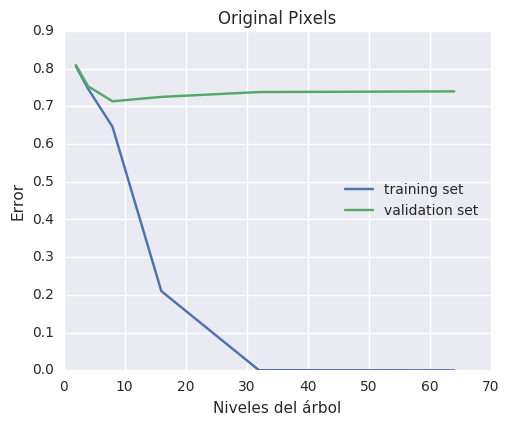

In [54]:
tree_test(Xtr, Ytr, Xval, Yval, 'Original Pixels')

#### Histogramas de color

In [35]:
features_tr = extract_features(Xtr, [color_histogram_hsv]) 
features_te = extract_features(Xte, [color_histogram_hsv])
features_val = extract_features(Xval, [color_histogram_hsv])

(43000, 32, 32, 3)
(10000, 32, 32, 3)
(7000, 32, 32, 3)


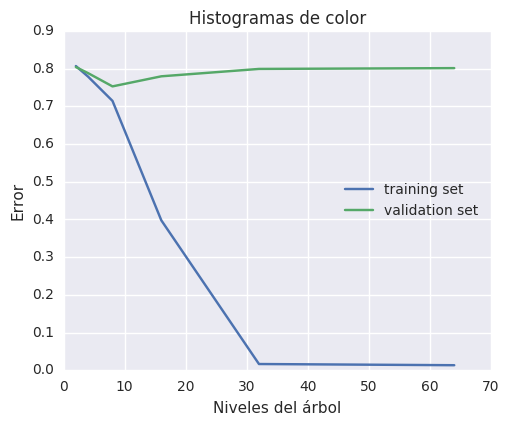

In [48]:
tree_test(features_tr, Ytr, features_val, Yval, 'Histogramas de color')

#### Hog features

In [49]:
features_tr = extract_features(Xtr, [hog_features])
features_te = extract_features(Xte, [hog_features])
features_val = extract_features(Xval, [hog_features])

(43000, 32, 32, 3)
(10000, 32, 32, 3)
(7000, 32, 32, 3)


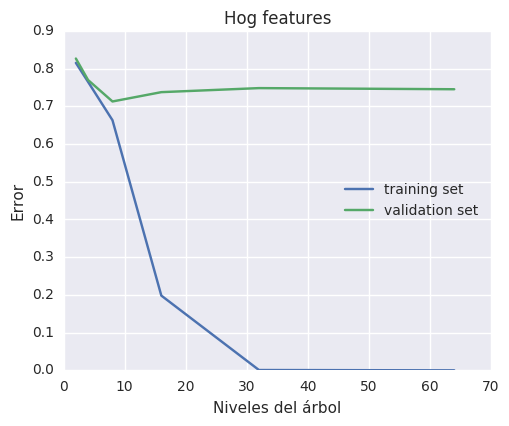

In [51]:
tree_test(features_tr, Ytr, features_val, Yval, 'Hog features')

#### All features

In [52]:
features_tr = extract_features(Xtr, [hog_features, color_histogram_hsv])
features_te = extract_features(Xte, [hog_features, color_histogram_hsv])
features_val = extract_features(Xval, [hog_features, color_histogram_hsv])

(43000, 32, 32, 3)
(10000, 32, 32, 3)
(7000, 32, 32, 3)


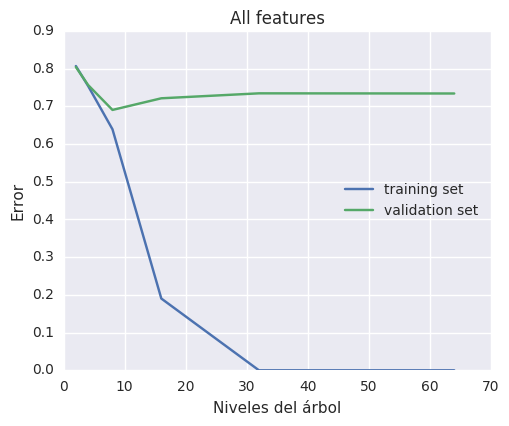

In [53]:
tree_test(features_tr, Ytr, features_val, Yval, 'All features')

Usando árboles de clasificación, se consigue un rendimiento bastante mediocre. Con la excepción del modelo *all features*, todos los demás obtienen un rendimiento por debajo del 30%. En los cuatro casos, el mínimo error de validación se obtiene con un árbol de 8 niveles. Posterior a eso, se produce un evidente overfitting. Se puede rescatar el hecho de que el utilizar una representación basada en histogramas de color, hog features, o ambas en conjunto, se genera un entrenamiento de los modelos de menor duración.  